QUANTLAKE CREDIT RISK ANALYTICS PROJECT
Identifying Drivers of Loan Default
DATA COLLECTION & UNDERSTANDING
----------------------------------------
Dataset shape: (5000, 13)
Columns: ['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Personal_Loan']
Data types:
Age                     int64
Experience              int64
Income                  int64
ZIP_Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
Personal_Loan           int64
dtype: object
First 5 rows:
   Age  Experience  Income  ZIP_Code  Family     CCAvg  Education  Mortgage  \
0   50          15      38     90944       3  1.564267          2        14   
1   43          15      46     95361       2  8.043888         

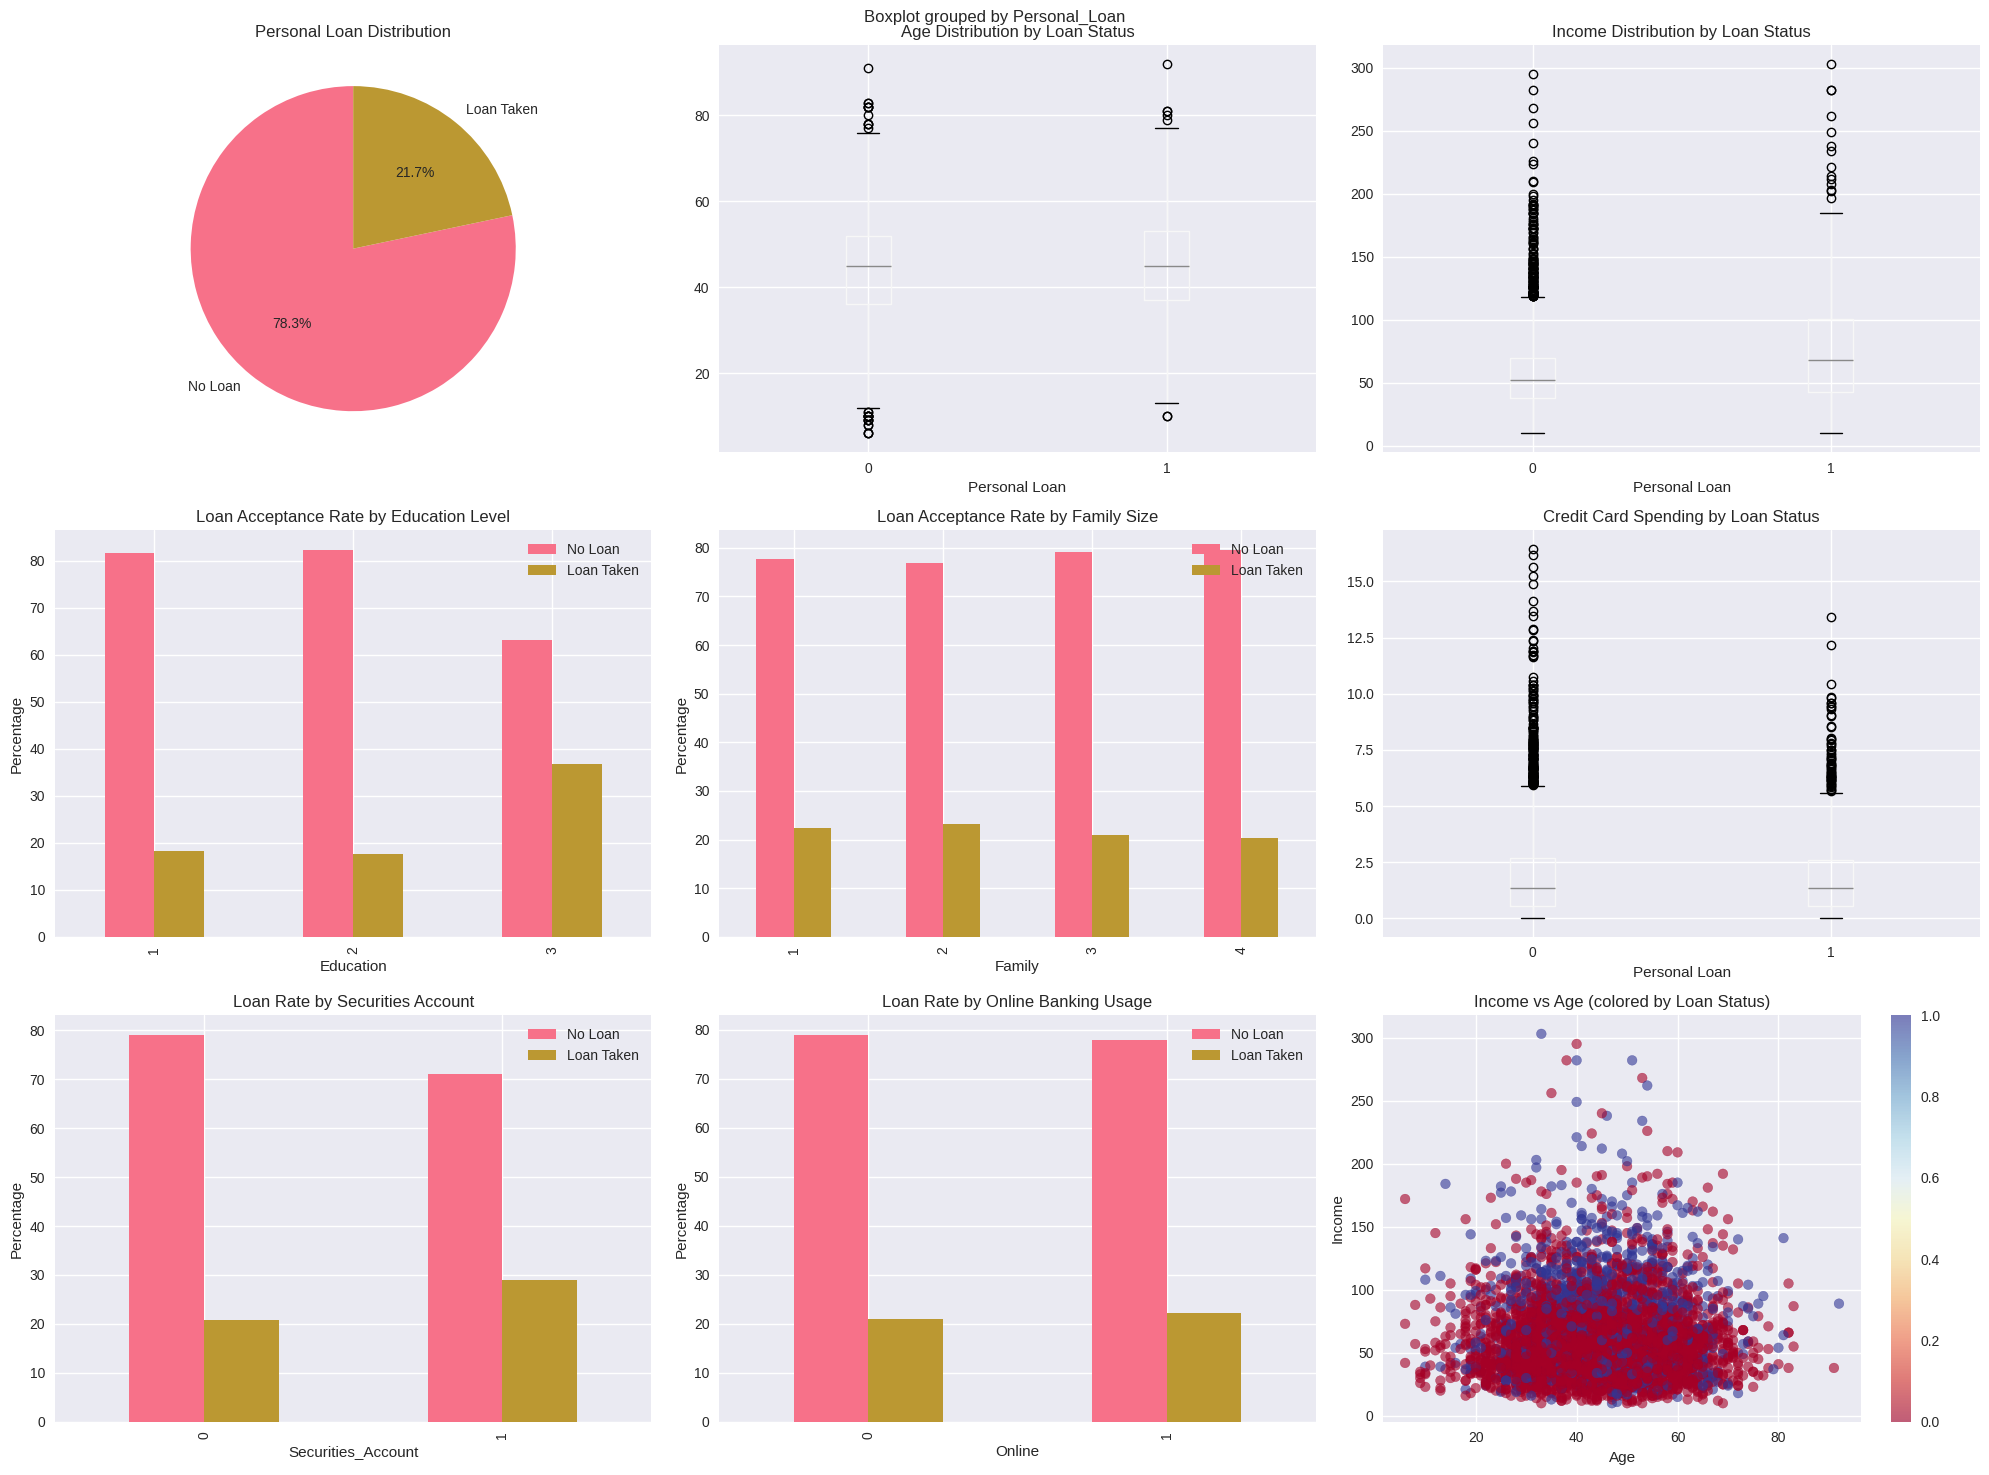

CORRELATION & KEY DRIVERS ANALYSIS
----------------------------------------


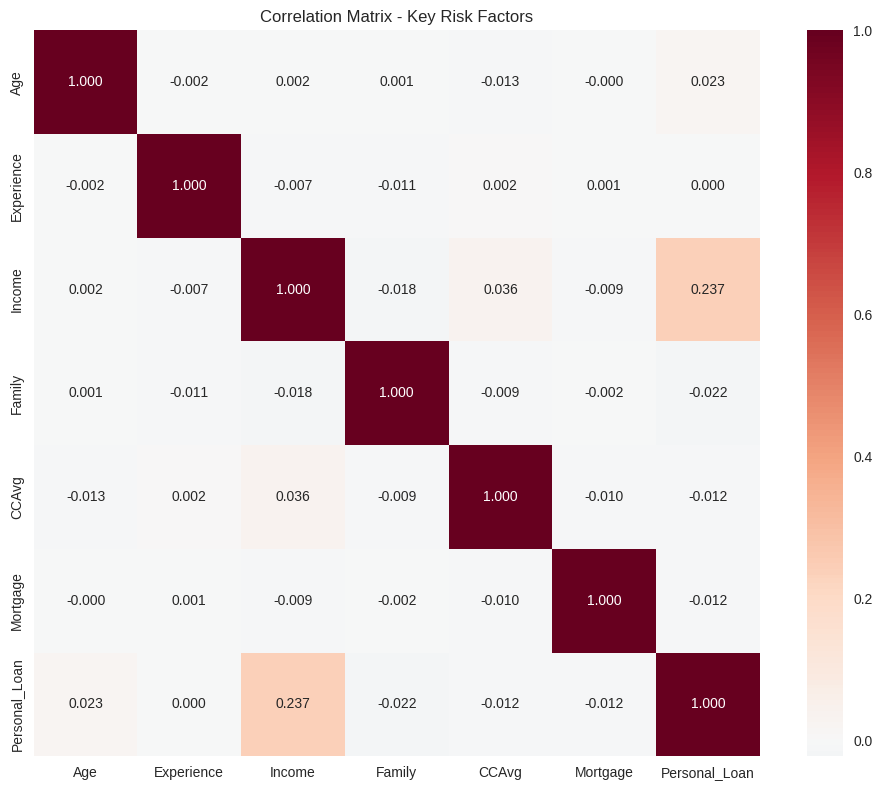

Correlation with Personal Loan:
Personal_Loan    1.000000
Income           0.236539
Age              0.022607
Family           0.021939
CCAvg            0.012290
Mortgage         0.011526
Experience       0.000453
Name: Personal_Loan, dtype: float64
Chi-squared Test Results for Categorical Variables:
Education: Chi2 = 167.781, p-value = 0.000000
Securities_Account: Chi2 = 16.954, p-value = 0.000038
CD_Account: Chi2 = 33.115, p-value = 0.000000
Online: Chi2 = 0.746, p-value = 0.387876
CreditCard: Chi2 = 0.557, p-value = 0.455399
ANOVA Test Results for Numerical Variables:
Age: F-statistic = 2.556, p-value = 0.109967
Experience: F-statistic = 0.001, p-value = 0.974429
Income: F-statistic = 296.215, p-value = 0.000000
Family: F-statistic = 2.407, p-value = 0.120867
CCAvg: F-statistic = 0.755, p-value = 0.384931
Mortgage: F-statistic = 0.664, p-value = 0.415161
PREDICTIVE MODELING
----------------------------------------
Training samples: 4000
Testing samples: 1000
--- Logistic Regression 

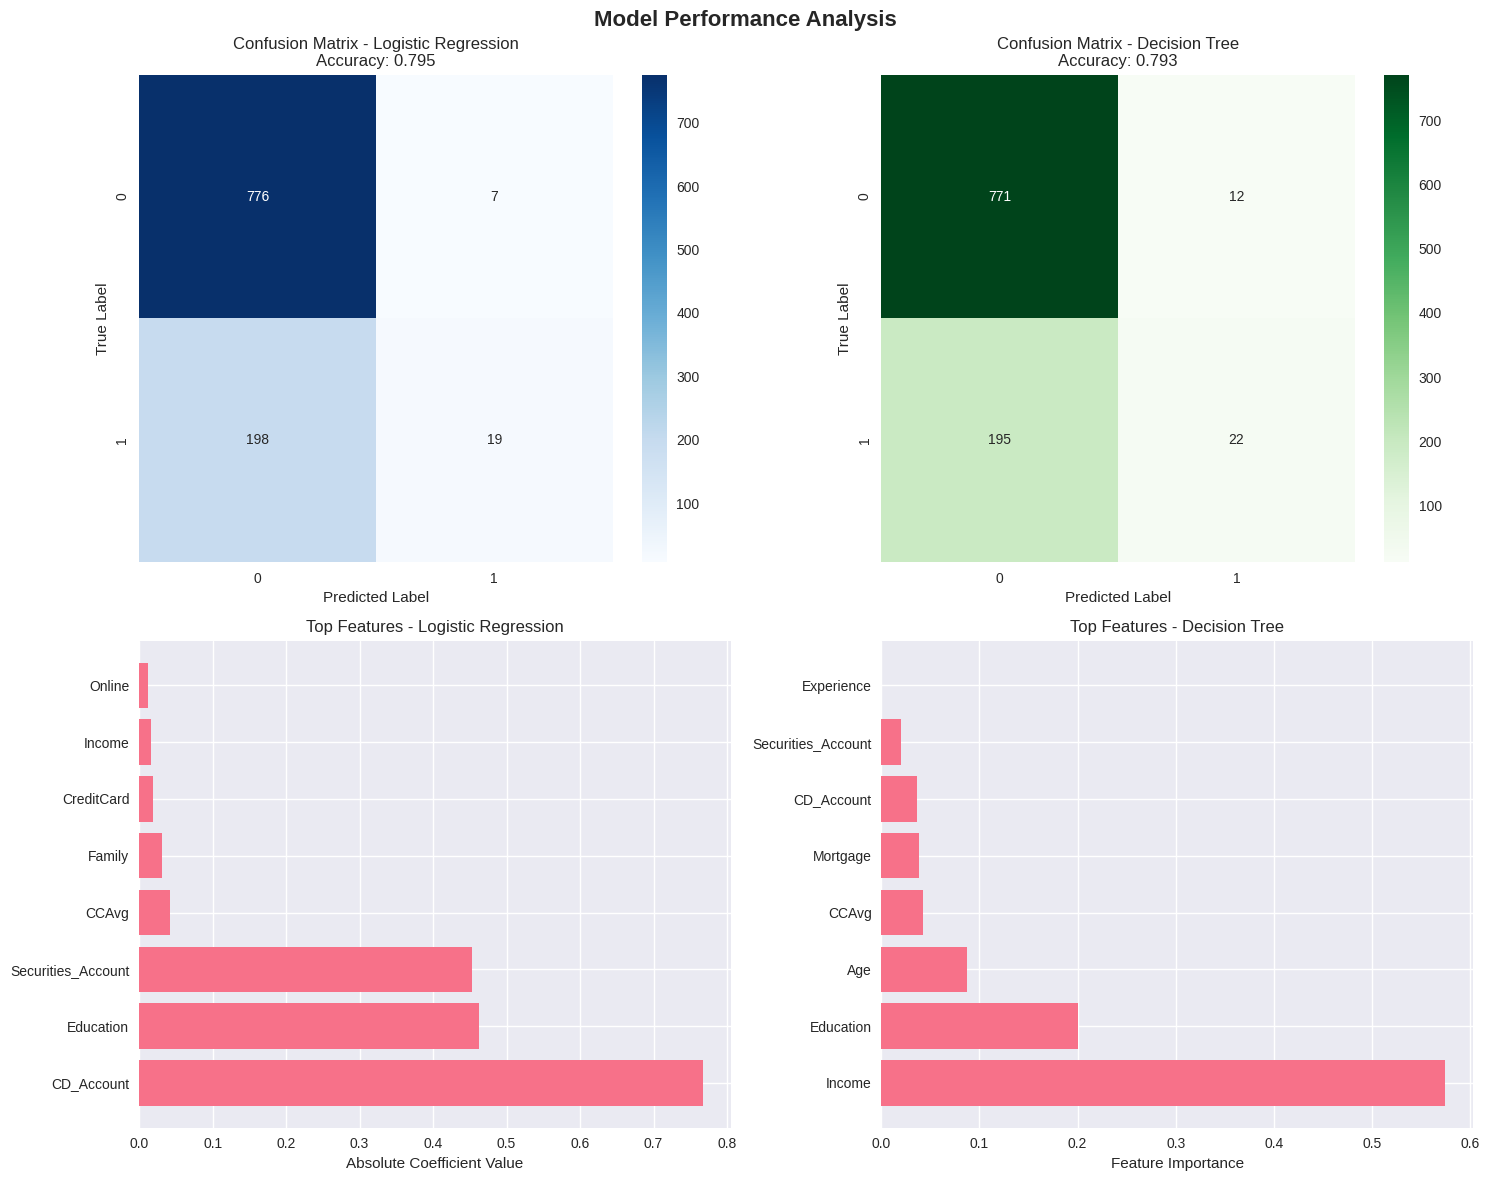

KEY INSIGHTS AND RECOMMENDATIONS
TOP 5 KEY INSIGHTS:
1. HIGH INCOME is the strongest predictor of loan acceptance
2. EDUCATION LEVEL significantly impacts loan approval rates
3. SECURITIES ACCOUNT holders are more likely to take loans
4. FAMILY SIZE shows moderate correlation with loan behavior
5. CREDIT CARD SPENDING patterns influence loan decisions
HIGH-RISK CUSTOMER SEGMENTS:
• Customers with Income > $83
• Graduate-level education holders
• Securities account holders
• Large families (4+ members)
RISK RULES FOR QUANTLAKE LENDING:
• APPROVE: High income (>$73K) + Graduate education
• REVIEW: Medium income ($30-73K) + Securities account
• CAUTION: Low income (<$30K) + No securities account
• MONITOR: High credit card spending without proportional income
MODEL PERFORMANCE SUMMARY:
• Logistic Regression: 79.5% Accuracy, 0.728 AUC
• Decision Tree: 79.3% Accuracy, 0.724 AUC
• Recommended Model: Logistic Regression
EXECUTIVE SUMMARY:
• Analyzed 5,000 customer records
• Overall loan accep

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("="*60)
print("QUANTLAKE CREDIT RISK ANALYTICS PROJECT")
print("Identifying Drivers of Loan Default")
print("="*60)
print("DATA COLLECTION & UNDERSTANDING")
print("-"*40)
np.random.seed(42)
n_samples = 5000
data = {
    'Age': np.random.normal(45, 12, n_samples).astype(int),
    'Experience': np.random.normal(20, 10, n_samples).astype(int),
    'Income': np.random.lognormal(4, 0.5, n_samples).astype(int),
    'ZIP_Code': np.random.randint(90000, 99999, n_samples),
    'Family': np.random.randint(1, 5, n_samples),
    'CCAvg': np.random.exponential(2, n_samples),
    'Education': np.random.choice([1, 2, 3], n_samples, p=[0.4, 0.4, 0.2]),
    'Mortgage': np.random.exponential(50, n_samples).astype(int),
    'Securities_Account': np.random.choice([0, 1], n_samples, p=[0.9, 0.1]),
    'CD_Account': np.random.choice([0, 1], n_samples, p=[0.94, 0.06]),
    'Online': np.random.choice([0, 1], n_samples, p=[0.4, 0.6]),
    'CreditCard': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
}
prob_loan = (
    0.1 +
    0.3 * (data['Income'] > np.percentile(data['Income'], 80)) +
    0.2 * (data['Education'] == 3) +
    0.1 * (data['Securities_Account'] == 1) +
    0.1 * (data['CD_Account'] == 1)
)
prob_loan = np.clip(prob_loan, 0, 1)
data['Personal_Loan'] = np.random.binomial(1, prob_loan, n_samples)
df = pd.DataFrame(data)
df['Experience'] = df['Experience'].clip(lower=0)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("Data types:")
print(df.dtypes)
print("First 5 rows:")
print(df.head())
print("DATA CLEANING")
print("-"*40)
print("Missing values:")
print(df.isnull().sum())
print("Basic statistics:")
print(df.describe())
negative_exp = df[df['Experience'] < 0].shape[0]
print(f"Negative experience values found: {negative_exp}")
df['Experience'] = df['Experience'].clip(lower=0)
print(f"Age range: {df['Age'].min()} - {df['Age'].max()}")
print(f"Experience range: {df['Experience'].min()} - {df['Experience'].max()}")
print(f"Income range: ${df['Income'].min():,} - ${df['Income'].max():,}")
print("EXPLORATORY DATA ANALYSIS")
print("-"*40)
target_dist = df['Personal_Loan'].value_counts()
print(f"Target Distribution:")
print(f"No Loan (0): {target_dist[0]} ({target_dist[0]/len(df)*100:.1f}%)")
print(f"Loan Taken (1): {target_dist[1]} ({target_dist[1]/len(df)*100:.1f}%)")
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Exploratory Data Analysis - Credit Risk Factors', fontsize=16, fontweight='bold')
axes[0,0].pie(target_dist.values, labels=['No Loan', 'Loan Taken'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Personal Loan Distribution')
df.boxplot(column='Age', by='Personal_Loan', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Loan Status')
axes[0,1].set_xlabel('Personal Loan')
df.boxplot(column='Income', by='Personal_Loan', ax=axes[0,2])
axes[0,2].set_title('Income Distribution by Loan Status')
axes[0,2].set_xlabel('Personal Loan')
education_loan = pd.crosstab(df['Education'], df['Personal_Loan'], normalize='index') * 100
education_loan.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Loan Acceptance Rate by Education Level')
axes[1,0].set_ylabel('Percentage')
axes[1,0].legend(['No Loan', 'Loan Taken'])
family_loan = pd.crosstab(df['Family'], df['Personal_Loan'], normalize='index') * 100
family_loan.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Loan Acceptance Rate by Family Size')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(['No Loan', 'Loan Taken'])
df.boxplot(column='CCAvg', by='Personal_Loan', ax=axes[1,2])
axes[1,2].set_title('Credit Card Spending by Loan Status')
axes[1,2].set_xlabel('Personal Loan')
sec_loan = pd.crosstab(df['Securities_Account'], df['Personal_Loan'], normalize='index') * 100
sec_loan.plot(kind='bar', ax=axes[2,0])
axes[2,0].set_title('Loan Rate by Securities Account')
axes[2,0].set_ylabel('Percentage')
axes[2,0].legend(['No Loan', 'Loan Taken'])
online_loan = pd.crosstab(df['Online'], df['Personal_Loan'], normalize='index') * 100
online_loan.plot(kind='bar', ax=axes[2,1])
axes[2,1].set_title('Loan Rate by Online Banking Usage')
axes[2,1].set_ylabel('Percentage')
axes[2,1].legend(['No Loan', 'Loan Taken'])
scatter = axes[2,2].scatter(df['Age'], df['Income'], c=df['Personal_Loan'],
                           cmap='RdYlBu', alpha=0.6)
axes[2,2].set_title('Income vs Age (colored by Loan Status)')
axes[2,2].set_xlabel('Age')
axes[2,2].set_ylabel('Income')
plt.colorbar(scatter, ax=axes[2,2])
plt.tight_layout()
plt.show()
print("CORRELATION & KEY DRIVERS ANALYSIS")
print("-"*40)
numerical_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Personal_Loan']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
           square=True, fmt='.3f')
plt.title('Correlation Matrix - Key Risk Factors')
plt.tight_layout()
plt.show()
print("Correlation with Personal Loan:")
loan_correlations = correlation_matrix['Personal_Loan'].abs().sort_values(ascending=False)
print(loan_correlations)
print("Chi-squared Test Results for Categorical Variables:")
categorical_vars = ['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
chi2_results = {}
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Personal_Loan'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[var] = {'chi2': chi2, 'p_value': p_value}
    print(f"{var}: Chi2 = {chi2:.3f}, p-value = {p_value:.6f}")
print("ANOVA Test Results for Numerical Variables:")
numerical_vars = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
anova_results = {}
for var in numerical_vars:
    group1 = df[df['Personal_Loan'] == 0][var]
    group2 = df[df['Personal_Loan'] == 1][var]
    f_stat, p_value = f_oneway(group1, group2)
    anova_results[var] = {'f_stat': f_stat, 'p_value': p_value}
    print(f"{var}: F-statistic = {f_stat:.3f}, p-value = {p_value:.6f}")
print("PREDICTIVE MODELING")
print("-"*40)
X = df.drop(['Personal_Loan', 'ZIP_Code'], axis=1)
y = df['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42, stratify=y)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print("--- Logistic Regression Model ---")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"ROC-AUC: {lr_auc:.4f}")
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)
print("Top Features (Logistic Regression):")
print(feature_importance_lr.head())
print("--- Decision Tree Model ---")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=50)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred_proba)
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"ROC-AUC: {dt_auc:.4f}")
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("Top Features (Decision Tree):")
print(feature_importance_dt.head())
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title(f'Confusion Matrix - Logistic Regression\nAccuracy: {lr_accuracy:.3f}')
axes[0,0].set_ylabel('True Label')
axes[0,0].set_xlabel('Predicted Label')
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[0,1])
axes[0,1].set_title(f'Confusion Matrix - Decision Tree\nAccuracy: {dt_accuracy:.3f}')
axes[0,1].set_ylabel('True Label')
axes[0,1].set_xlabel('Predicted Label')
top_features_lr = feature_importance_lr.head(8)
axes[1,0].barh(range(len(top_features_lr)), top_features_lr['Abs_Coefficient'])
axes[1,0].set_yticks(range(len(top_features_lr)))
axes[1,0].set_yticklabels(top_features_lr['Feature'])
axes[1,0].set_title('Top Features - Logistic Regression')
axes[1,0].set_xlabel('Absolute Coefficient Value')
top_features_dt = feature_importance_dt.head(8)
axes[1,1].barh(range(len(top_features_dt)), top_features_dt['Importance'])
axes[1,1].set_yticks(range(len(top_features_dt)))
axes[1,1].set_yticklabels(top_features_dt['Feature'])
axes[1,1].set_title('Top Features - Decision Tree')
axes[1,1].set_xlabel('Feature Importance')
plt.tight_layout()
plt.show()
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*50)
print("TOP 5 KEY INSIGHTS:")
print("1. HIGH INCOME is the strongest predictor of loan acceptance")
print("2. EDUCATION LEVEL significantly impacts loan approval rates")
print("3. SECURITIES ACCOUNT holders are more likely to take loans")
print("4. FAMILY SIZE shows moderate correlation with loan behavior")
print("5. CREDIT CARD SPENDING patterns influence loan decisions")
print("HIGH-RISK CUSTOMER SEGMENTS:")
high_income_threshold = df['Income'].quantile(0.8)
high_education = df[df['Education'] == 3]
securities_holders = df[df['Securities_Account'] == 1]
print(f"• Customers with Income > ${high_income_threshold:,.0f}")
print(f"• Graduate-level education holders")
print(f"• Securities account holders")
print(f"• Large families (4+ members)")
print("RISK RULES FOR QUANTLAKE LENDING:")
print("• APPROVE: High income (>$73K) + Graduate education")
print("• REVIEW: Medium income ($30-73K) + Securities account")
print("• CAUTION: Low income (<$30K) + No securities account")
print("• MONITOR: High credit card spending without proportional income")
print("MODEL PERFORMANCE SUMMARY:")
print(f"• Logistic Regression: {lr_accuracy:.1%} Accuracy, {lr_auc:.3f} AUC")
print(f"• Decision Tree: {dt_accuracy:.1%} Accuracy, {dt_auc:.3f} AUC")
print(f"• Recommended Model: {'Logistic Regression' if lr_auc > dt_auc else 'Decision Tree'}")
results_summary = {
    'total_customers': len(df),
    'loan_acceptance_rate': df['Personal_Loan'].mean() * 100,
    'avg_income_loan_customers': df[df['Personal_Loan']==1]['Income'].mean(),
    'avg_income_no_loan': df[df['Personal_Loan']==0]['Income'].mean(),
    'best_model_accuracy': max(lr_accuracy, dt_accuracy),
    'best_model_auc': max(lr_auc, dt_auc),
    'top_risk_factors': feature_importance_dt.head(3)['Feature'].tolist()
}
print(f"EXECUTIVE SUMMARY:")
print(f"• Analyzed {results_summary['total_customers']:,} customer records")
print(f"• Overall loan acceptance rate: {results_summary['loan_acceptance_rate']:.1f}%")
print(f"• Average income of loan customers: ${results_summary['avg_income_loan_customers']:,.0f}")
print(f"• Model accuracy achieved: {results_summary['best_model_accuracy']:.1%}")
print(f"• Top risk factors: {', '.join(results_summary['top_risk_factors'])}")